In [ ]:
#Taken from https://www.kaggle.com/kanncaa1/does-alcohol-affect-success

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # graph
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

In [6]:
math = pd.read_csv("student-mat.csv")
por = pd.read_csv("student-por.csv")

### Data Exploration

In [7]:
math.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
len(math)

395

In [9]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [10]:
len(por)

649

In [11]:
math.rename(columns={'G1':'G1_Mat', 'G2':'G2_Mat', 'G3':'G3_Mat'}, inplace=True)

In [12]:
por.rename(columns={'G1':'G1_Por', 'G2':'G2_Por', 'G3':'G3_Por'}, inplace=True)

In [13]:
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_Mat', 'G2_Mat', 'G3_Mat'],
      dtype='object')

In [14]:
# Students with grades in Math and Portuguese
both = pd.merge(math, por, on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'])
both = both.drop_duplicates()

In [15]:
len(both)

85

In [16]:
por.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1_Por        0
G2_Por        0
G3_Por        0
dtype: int64

In [17]:
por.school.value_counts(normalize=True)

GP    0.651772
MS    0.348228
Name: school, dtype: float64

In [18]:
print("%s%% of the students are in Gabriel Pereira school" % (100*round(por.school.value_counts(normalize=True)[0],4)))

65.18% of the students are in Gabriel Pereira school


In [19]:
por.sex.value_counts(normalize=True)

F    0.590139
M    0.409861
Name: sex, dtype: float64

In [20]:
print("%s%% of the students are girls" % (100*round(por.sex.value_counts(normalize=True)[0],4)))

59.01% of the students are girls


<AxesSubplot:xlabel='school', ylabel='count'>

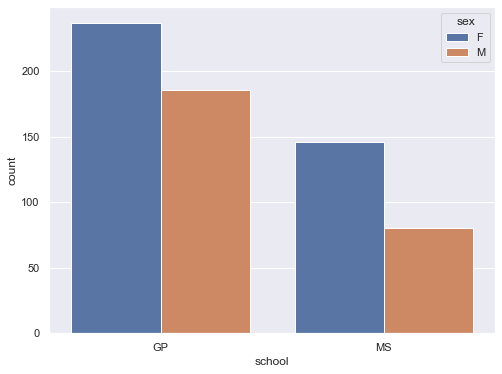

In [21]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x="school", hue ="sex", data=por)

<AxesSubplot:xlabel='age', ylabel='count'>

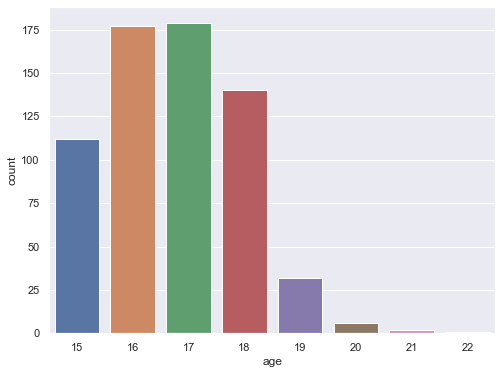

In [22]:
sns.countplot(por.age)

In [23]:
por.address.value_counts(normalize=True)

U    0.696456
R    0.303544
Name: address, dtype: float64

In [24]:
print("%s%% of the students live in an urban area" % (100*round(por.address.value_counts(normalize=True)[0],4)))

69.65% of the students live in an urban area


In [25]:
por.famsize.value_counts(normalize=True)

GT3    0.70416
LE3    0.29584
Name: famsize, dtype: float64

In [26]:
print("%s%% of the students live in a family with more than 3 members" % (100*round(por.famsize.value_counts(normalize=True)[0],4)))

70.42% of the students live in a family with more than 3 members


<AxesSubplot:xlabel='school', ylabel='count'>

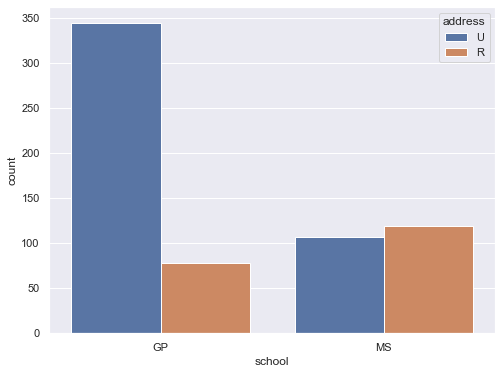

In [27]:
sns.countplot(x="school", hue ="address", data=por)

In [28]:
por.Pstatus.value_counts(normalize=True)

T    0.876733
A    0.123267
Name: Pstatus, dtype: float64

In [29]:
print("%s%% of the students' parents live together" % (100*round(por.Pstatus.value_counts(normalize=True)[0],4)))

87.67% of the students' parents live together


<AxesSubplot:xlabel='Pstatus', ylabel='count'>

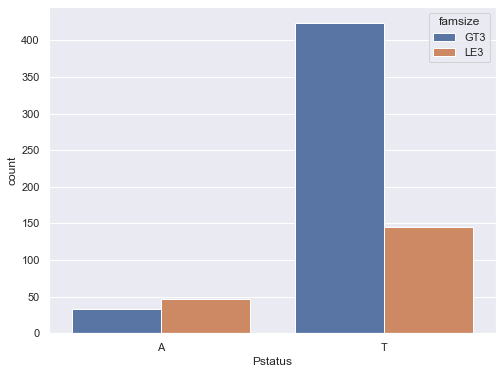

In [30]:
sns.countplot(x="Pstatus", hue ="famsize", data=por)

<AxesSubplot:xlabel='Medu', ylabel='count'>

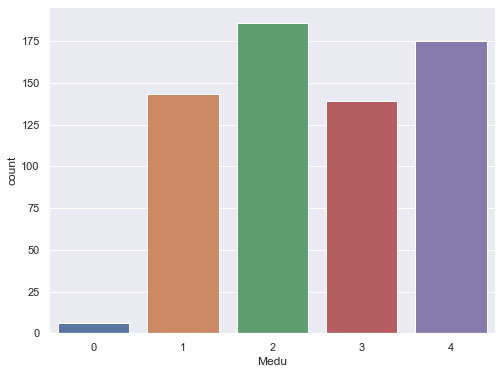

In [31]:
sns.countplot(por.Medu)

<AxesSubplot:xlabel='Fedu', ylabel='count'>

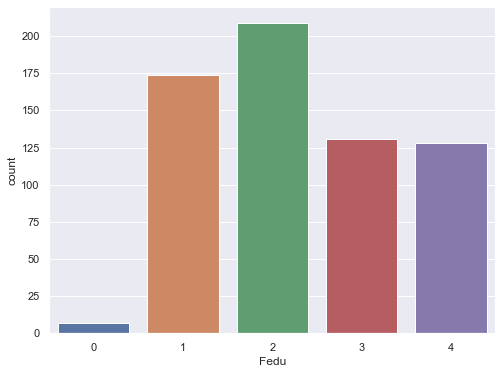

In [32]:
sns.countplot(por.Fedu)

<AxesSubplot:xlabel='Medu', ylabel='count'>

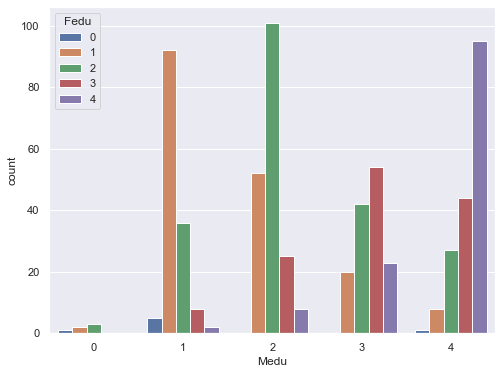

In [33]:
sns.countplot(x="Medu", hue ="Fedu", data=por)

<AxesSubplot:xlabel='Mjob', ylabel='count'>

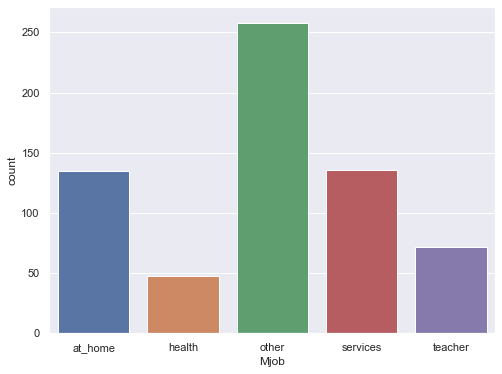

In [34]:
sns.countplot(por.Mjob)

In [35]:
por.Mjob.value_counts(normalize=True)

other       0.397535
services    0.209553
at_home     0.208012
teacher     0.110940
health      0.073960
Name: Mjob, dtype: float64

In [36]:
print("%s%% of the mothers are at home" % (100*round(por.Mjob.value_counts(normalize=True)[2],4)))

20.8% of the mothers are at home


<AxesSubplot:xlabel='Fjob', ylabel='count'>

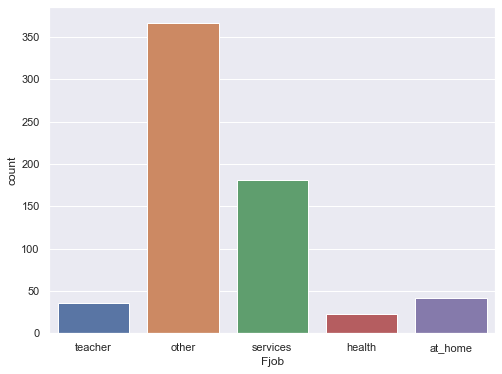

In [37]:
sns.countplot(por.Fjob)

In [38]:
por.Fjob.value_counts(normalize=True)

other       0.565485
services    0.278891
at_home     0.064715
teacher     0.055470
health      0.035439
Name: Fjob, dtype: float64

In [39]:
print("%s%% of the fathers are at home" % (100*round(por.Fjob.value_counts(normalize=True)[2],4)))

6.47% of the fathers are at home


<AxesSubplot:xlabel='Mjob', ylabel='count'>

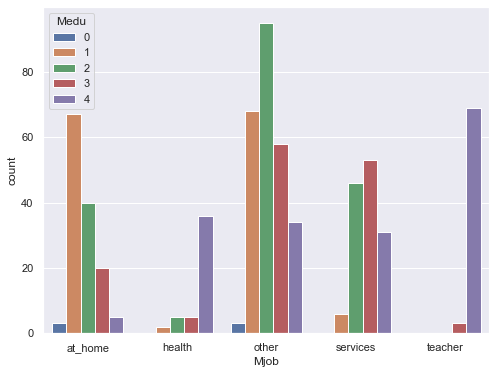

In [40]:
sns.countplot(x="Mjob", hue ="Medu", data=por)

<AxesSubplot:xlabel='Fjob', ylabel='count'>

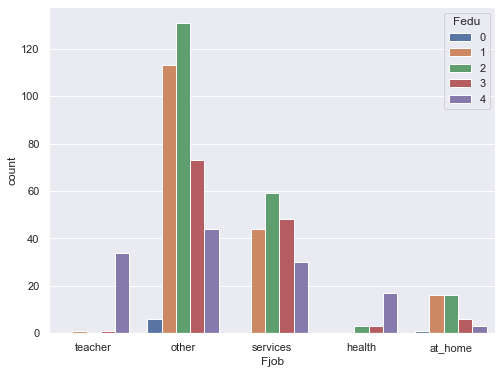

In [41]:
sns.countplot(x="Fjob", hue ="Fedu", data=por)

<AxesSubplot:xlabel='reason', ylabel='count'>

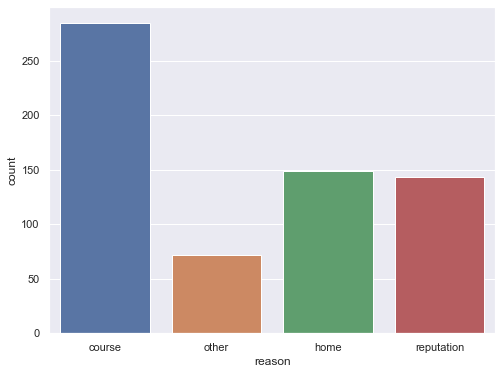

In [42]:
sns.countplot(por.reason)

In [43]:
por.guardian.value_counts(normalize=True)

mother    0.701079
father    0.235747
other     0.063174
Name: guardian, dtype: float64

<AxesSubplot:xlabel='age', ylabel='count'>

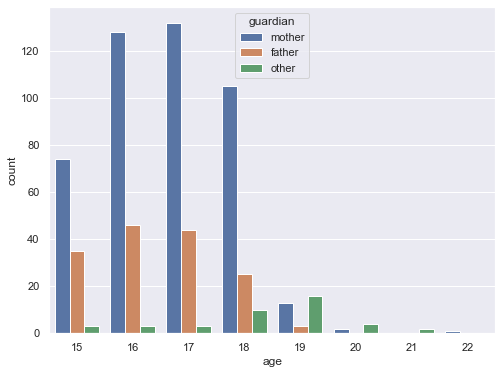

In [44]:
sns.countplot(x="age", hue ="guardian", data=por)

<AxesSubplot:xlabel='traveltime', ylabel='count'>

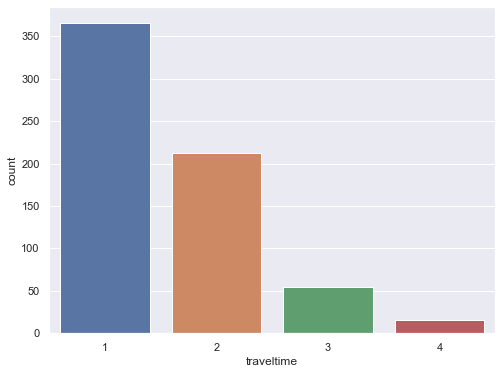

In [45]:
sns.countplot(por.traveltime)

<AxesSubplot:xlabel='address', ylabel='count'>

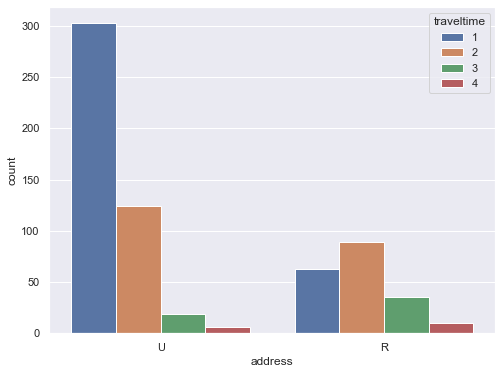

In [46]:
sns.countplot(x="address", hue ="traveltime", data=por)

<AxesSubplot:xlabel='school', ylabel='count'>

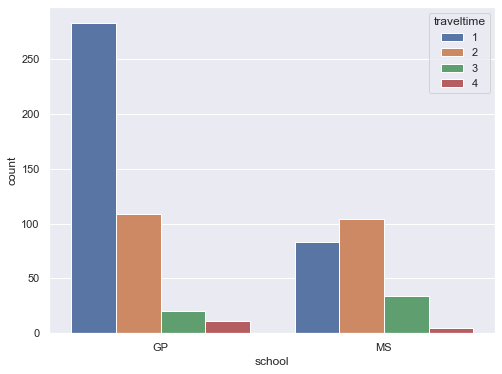

In [47]:
sns.countplot(x="school", hue ="traveltime", data=por)

<AxesSubplot:xlabel='studytime', ylabel='count'>

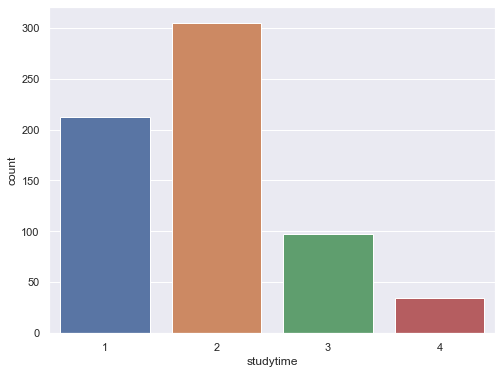

In [48]:
sns.countplot(por.studytime)

<AxesSubplot:xlabel='school', ylabel='count'>

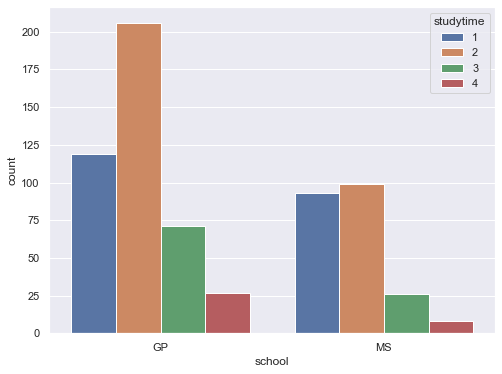

In [49]:
sns.countplot(x="school", hue ="studytime", data=por)

<AxesSubplot:xlabel='failures', ylabel='count'>

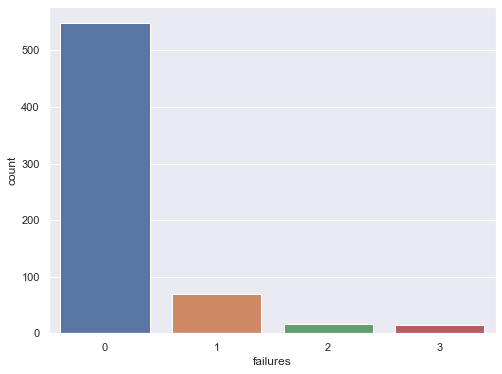

In [50]:
sns.countplot(por.failures)

<AxesSubplot:xlabel='age', ylabel='count'>

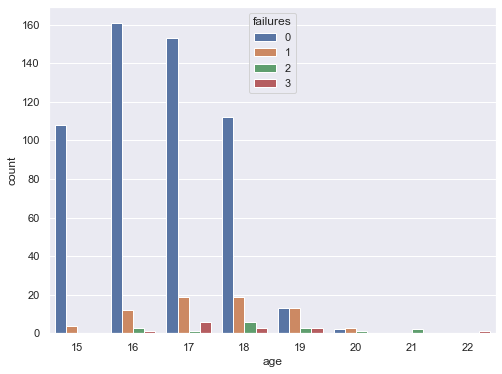

In [51]:
sns.countplot(x="age", hue="failures", data=por)

In [52]:
por.schoolsup.value_counts(normalize=True)

no     0.895223
yes    0.104777
Name: schoolsup, dtype: float64

In [53]:
por.famsup.value_counts(normalize=True)

yes    0.613251
no     0.386749
Name: famsup, dtype: float64

<AxesSubplot:xlabel='school', ylabel='count'>

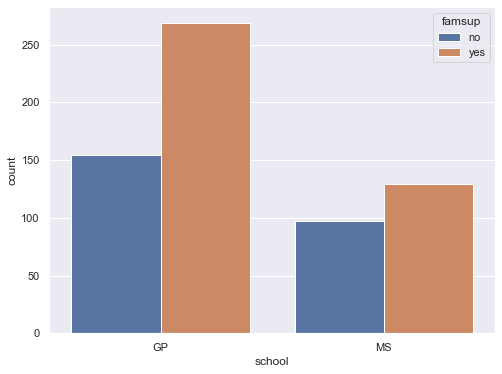

In [54]:
sns.countplot(x="school", hue="famsup", data=por)

In [55]:
por.paid.value_counts(normalize=True)

no     0.939908
yes    0.060092
Name: paid, dtype: float64

<AxesSubplot:xlabel='famsup', ylabel='count'>

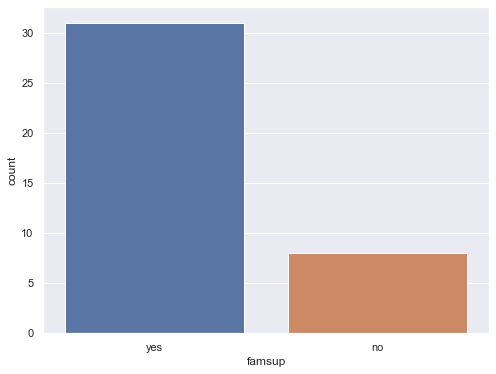

In [56]:
sns.countplot(por[por.paid == 'yes']['famsup'])

In [57]:
por.activities.value_counts(normalize=True)

no     0.514638
yes    0.485362
Name: activities, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='count'>

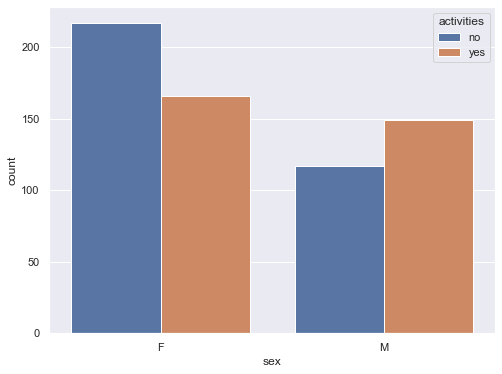

In [58]:
sns.countplot(x="sex", hue="activities", data=por)

In [59]:
por.nursery.value_counts(normalize=True)

yes    0.802773
no     0.197227
Name: nursery, dtype: float64

<AxesSubplot:xlabel='Medu', ylabel='count'>

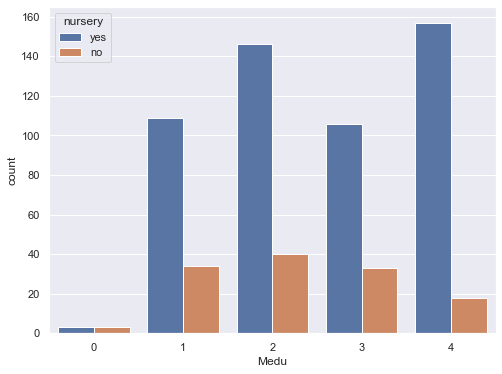

In [60]:
sns.countplot(x="Medu", hue="nursery", data=por)

In [61]:
por.higher.value_counts(normalize=True)

yes    0.893683
no     0.106317
Name: higher, dtype: float64

<AxesSubplot:xlabel='failures', ylabel='count'>

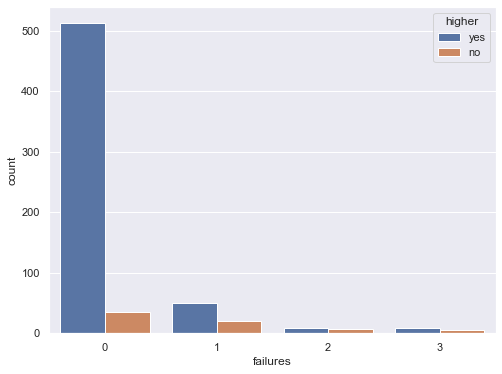

In [62]:
sns.countplot(x="failures", hue="higher", data=por)

<AxesSubplot:xlabel='age', ylabel='count'>

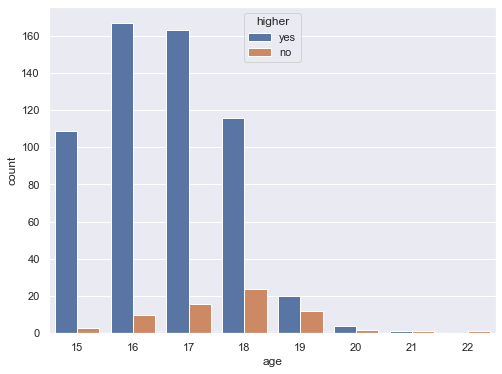

In [63]:
sns.countplot(x="age", hue="higher", data=por)

In [64]:
por.internet.value_counts(normalize=True)

yes    0.767334
no     0.232666
Name: internet, dtype: float64

<AxesSubplot:xlabel='Medu', ylabel='count'>

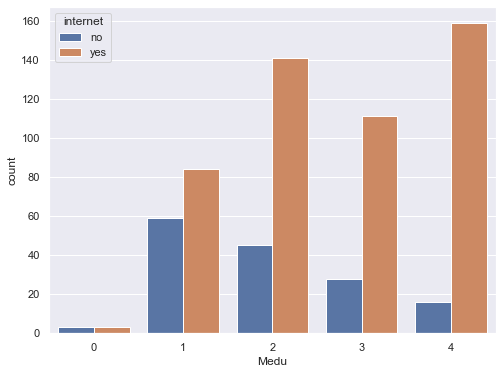

In [65]:
sns.countplot(x="Medu", hue="internet", data=por)

<AxesSubplot:xlabel='Mjob', ylabel='count'>

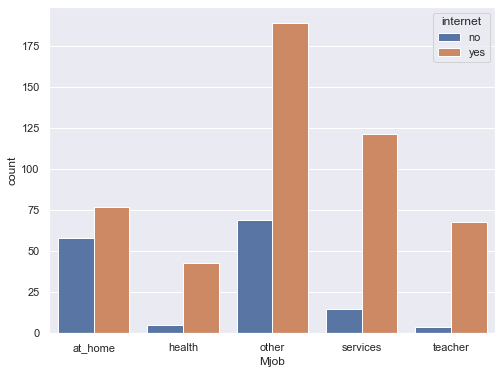

In [66]:
sns.countplot(x="Mjob", hue="internet", data=por)

<AxesSubplot:xlabel='school', ylabel='count'>

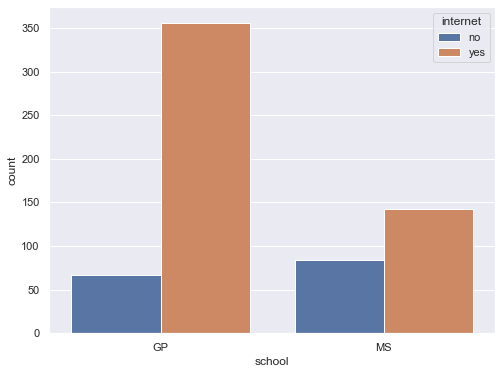

In [67]:
sns.countplot(x="school", hue="internet", data=por)

In [68]:
por.romantic.value_counts(normalize=True)

no     0.631741
yes    0.368259
Name: romantic, dtype: float64

<AxesSubplot:xlabel='age', ylabel='count'>

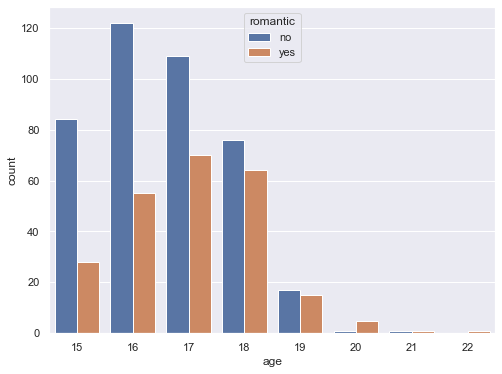

In [69]:
sns.countplot(x="age", hue="romantic", data=por)

<AxesSubplot:xlabel='famrel', ylabel='count'>

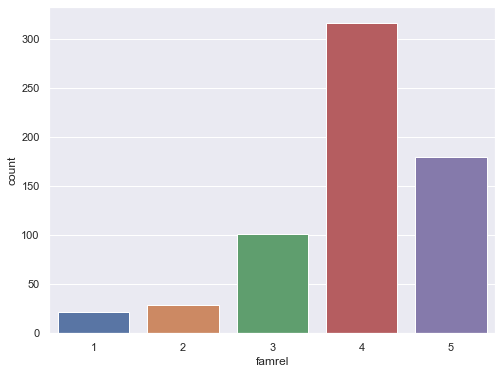

In [70]:
sns.countplot(por.famrel)

<AxesSubplot:xlabel='freetime', ylabel='count'>

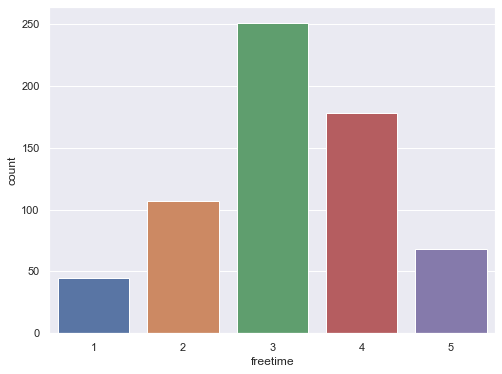

In [71]:
sns.countplot(por.freetime)

In [72]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1_Por,G2_Por,G3_Por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


<AxesSubplot:xlabel='goout', ylabel='count'>

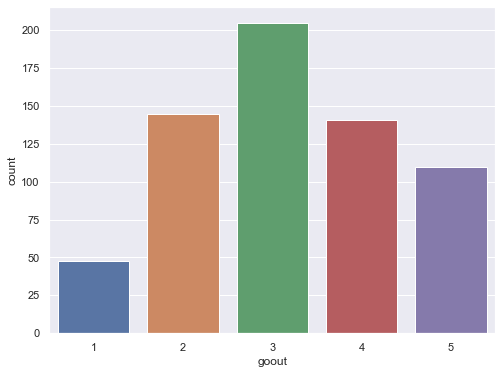

In [73]:
sns.countplot(por.goout)

<AxesSubplot:xlabel='freetime', ylabel='count'>

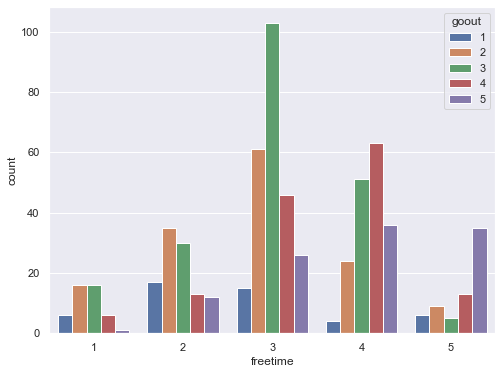

In [74]:
sns.countplot(x="freetime", hue="goout", data=por)

<AxesSubplot:xlabel='Dalc', ylabel='count'>

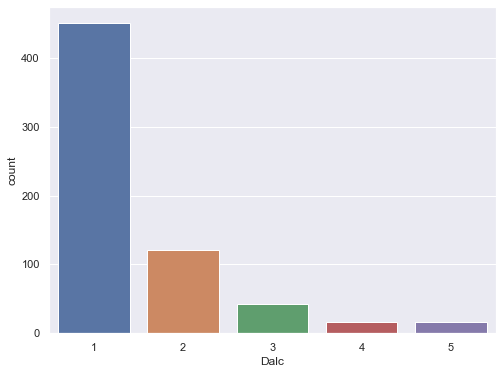

In [75]:
sns.countplot(por.Dalc)

<AxesSubplot:xlabel='goout', ylabel='count'>

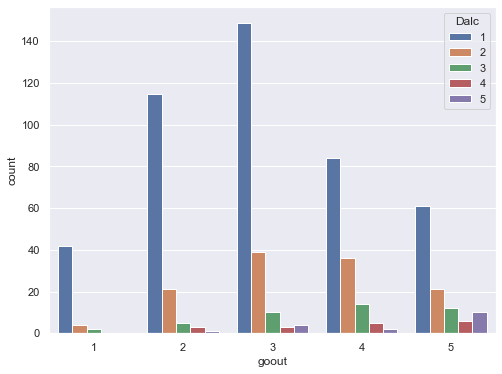

In [76]:
sns.countplot(x="goout", hue="Dalc", data=por)

<AxesSubplot:xlabel='sex', ylabel='count'>

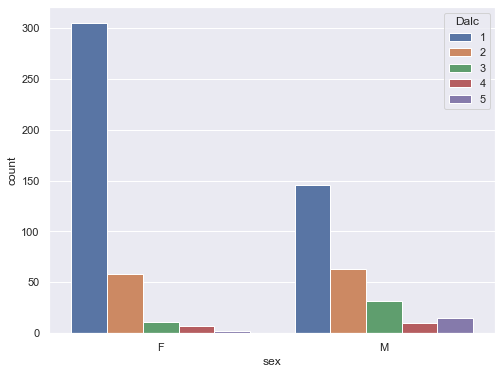

In [77]:
sns.countplot(x="sex", hue="Dalc", data=por)

<AxesSubplot:xlabel='Walc', ylabel='count'>

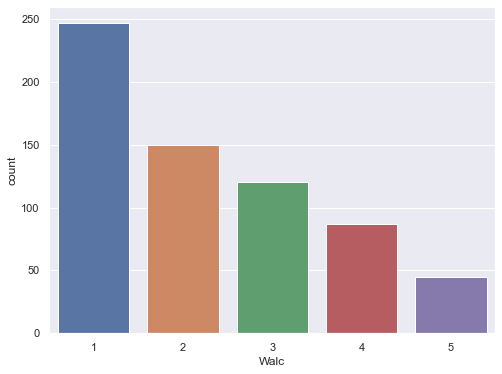

In [78]:
sns.countplot(por.Walc)

<AxesSubplot:xlabel='Dalc', ylabel='count'>

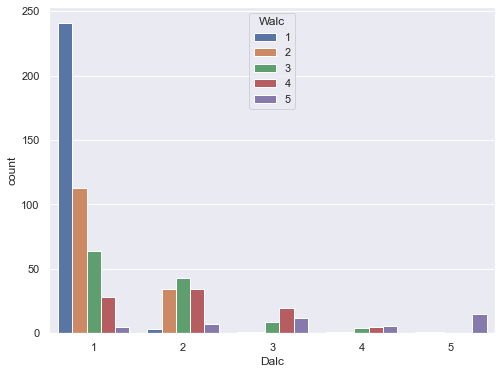

In [79]:
sns.countplot(x="Dalc", hue="Walc", data=por)

<AxesSubplot:xlabel='health', ylabel='count'>

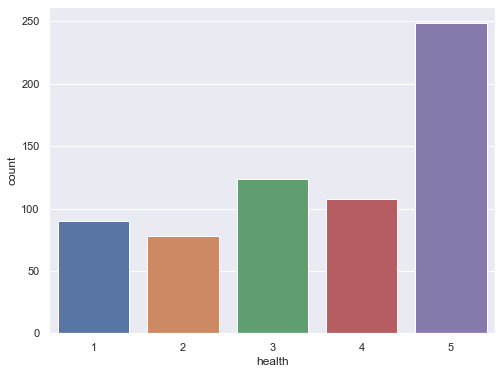

In [80]:
sns.countplot(por.health)

<AxesSubplot:xlabel='sex', ylabel='count'>

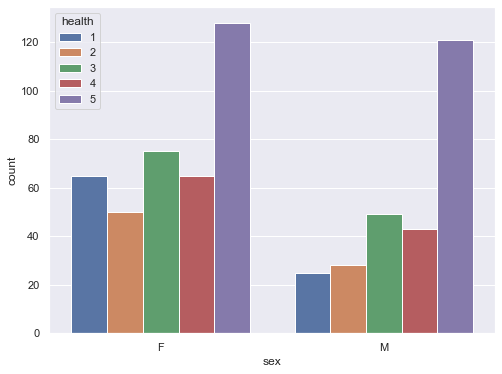

In [81]:
sns.countplot(x="sex", hue="health", data=por)

<AxesSubplot:xlabel='Walc', ylabel='count'>

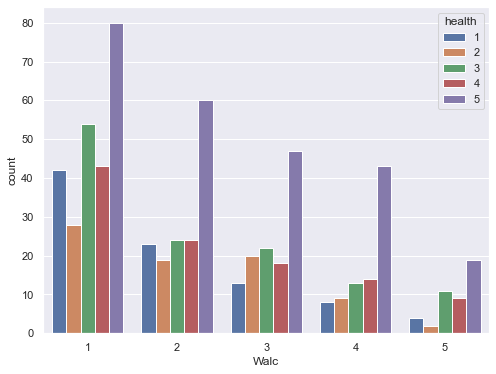

In [82]:
sns.countplot(x="Walc", hue="health", data=por)

<AxesSubplot:xlabel='absences', ylabel='Density'>

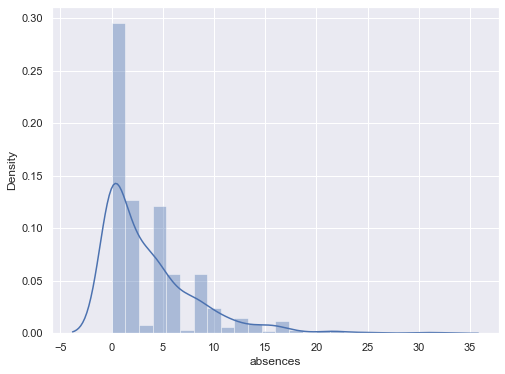

In [83]:
sns.distplot(por.absences)

In [84]:
por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_Por', 'G2_Por', 'G3_Por'],
      dtype='object')

In [85]:
por['Total_Grades'] = por['G1_Por'] + por['G2_Por'] + por['G3_Por']

<AxesSubplot:xlabel='Total_Grades', ylabel='Density'>

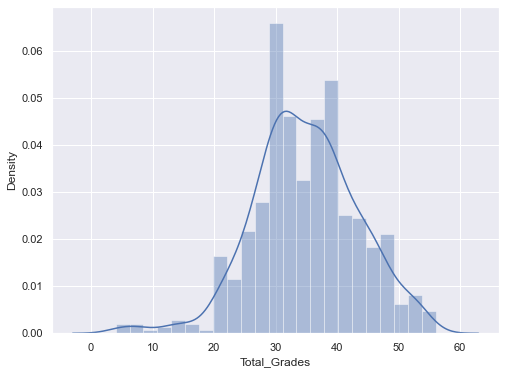

In [86]:
sns.distplot(por.Total_Grades)

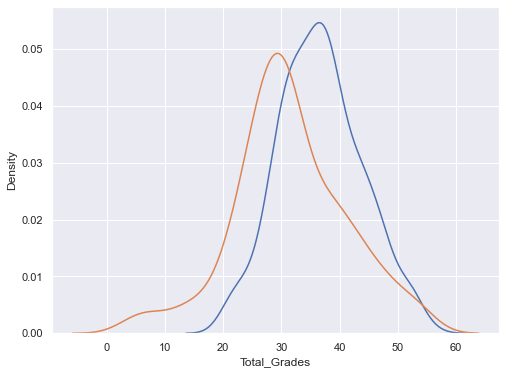

In [87]:
GP = por[por.school == 'GP']
MS = por[por.school == 'MS']

sns.distplot(GP.Total_Grades, hist=False, label="GP")
sns.distplot(MS.Total_Grades, hist=False, label="MS")
plt.show()

### Data Cleaning

In [88]:
por['school'] = por['school'].map({'GP': 0, 'MS': 1}).astype(int)
por['sex'] = por['sex'].map({'M': 0, 'F': 1}).astype(int)
por['address'] = por['address'].map({'R': 0, 'U': 1}).astype(int)
por['famsize'] = por['famsize'].map({'LE3': 0, 'GT3': 1}).astype(int)
por['Pstatus'] = por['Pstatus'].map({'A': 0, 'T': 1}).astype(int)
por['Mjob'] = por['Mjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
por['Fjob'] = por['Fjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
por['reason'] = por['reason'].map({'course': 0, 'other': 1, 'home': 2, 'reputation': 3}).astype(int)
por['guardian'] = por['guardian'].map({'mother': 0, 'father': 1, 'other': 2}).astype(int)
por['schoolsup'] = por['schoolsup'].map({'no': 0, 'yes': 1}).astype(int)
por['famsup'] = por['famsup'].map({'no': 0, 'yes': 1}).astype(int)
por['paid'] = por['paid'].map({'no': 0, 'yes': 1}).astype(int)
por['activities'] = por['activities'].map({'no': 0, 'yes': 1}).astype(int)
por['nursery'] = por['nursery'].map({'no': 0, 'yes': 1}).astype(int)
por['higher'] = por['higher'].map({'no': 0, 'yes': 1}).astype(int)
por['internet'] = por['internet'].map({'no': 0, 'yes': 1}).astype(int)
por['romantic'] = por['romantic'].map({'no': 0, 'yes': 1}).astype(int)

In [89]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1_Por,G2_Por,G3_Por,Total_Grades
0,0,1,18,1,1,0,4,4,0,4,...,3,4,1,1,3,4,0,11,11,22
1,0,1,17,1,1,1,1,1,0,2,...,3,3,1,1,3,2,9,11,11,31
2,0,1,15,1,0,1,1,1,0,2,...,3,2,2,3,3,6,12,13,12,37
3,0,1,15,1,1,1,4,2,1,3,...,2,2,1,1,5,0,14,14,14,42
4,0,1,16,1,1,1,3,3,2,2,...,3,2,1,2,5,0,11,13,13,37


### Grades Prediction

In [90]:
por.corr()['Total_Grades'].sort_values(ascending=False)

Total_Grades    1.000000
G2_Por          0.971256
G3_Por          0.961829
G1_Por          0.933554
higher          0.352762
Medu            0.265905
studytime       0.261630
Fedu            0.227918
reason          0.193178
Mjob            0.167727
address         0.167455
internet        0.152914
sex             0.118333
Fjob            0.085200
activities      0.071621
famrel          0.070550
famsup          0.047932
nursery         0.034661
Pstatus         0.011045
guardian       -0.041477
famsize        -0.045694
paid           -0.052771
schoolsup      -0.067830
health         -0.082420
goout          -0.084467
romantic       -0.092213
freetime       -0.113723
absences       -0.125015
age            -0.133499
traveltime     -0.151066
Walc           -0.173906
Dalc           -0.205792
school         -0.295035
failures       -0.405815
Name: Total_Grades, dtype: float64

In [91]:
grades_corr = por.corr()['Total_Grades']

In [92]:
grades_corr = pd.DataFrame({'col':grades_corr.index, 'correlation':grades_corr.values})

In [93]:
no_corr_cols = grades_corr[(grades_corr.correlation < 0.1) & (grades_corr.correlation > -0.1)]
no_corr_cols = list(no_corr_cols.col)

In [94]:
# Droping grades because they are too correlated and can bias the model
X = por.drop(['G1_Por', 'G2_Por', 'G3_Por', 'Total_Grades'], axis=1)
y = por['Total_Grades']

In [95]:
# Droping columns with no correlation
X = X.drop(no_corr_cols, axis=1)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor()]
names = ['LinearRegression', 'Ridge', 'Lasso', 'DecisionTreeRegressor']

for name, clf in zip(names, models):
    cv_model = cross_val_score(clf, X, y, cv=5).mean()
    print(name, ': %s' % cv_model)

LinearRegression : 0.18966670191119872
Ridge : 0.19042748016427105
Lasso : 0.08817650775853407
DecisionTreeRegressor : -0.7205291923336496


In [96]:
dtr = DecisionTreeRegressor()
cvs = range(2,20)
cvs_models = []
for i in cvs:
    cvs_models.append(abs(cross_val_score(clf, X, y, cv=i).mean()))
    
print('Best score with', cvs_models.index(min(cvs_models)), 'subsets : %s' % max(cvs_models))

Best score with 10 subsets : 0.8735411196562011


In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [98]:
dtr = DecisionTreeRegressor()

In [99]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [100]:
dtr.score(X_test,y_test)

-0.4309858649241325

In [103]:
import joblib
joblib.dump(dtr, "model.pkl")
joblib.dump(X_train, "x_train.pkl")
joblib.dump(X_test, "x_test.pkl")
joblib.dump(y_train, "y_train.pkl")
joblib.dump(y_test, "y_test.pkl")

['y_test.pkl']